# Prediction using supervised ML

## In this task we will be predicting student percentage based on number of hours studied.

In [83]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [84]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [85]:
df.axes

[RangeIndex(start=0, stop=25, step=1),
 Index(['Hours', 'Scores'], dtype='object')]

In [86]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [87]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## EDA on the dataset

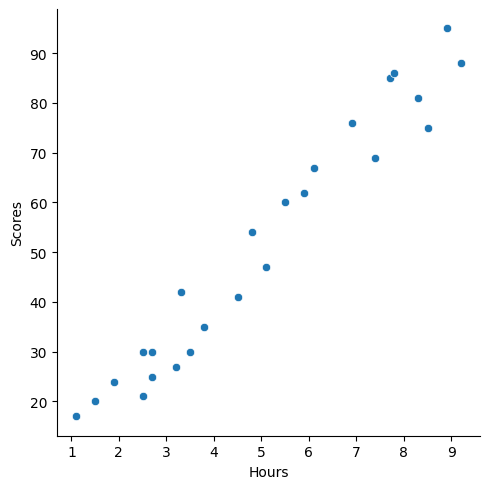

In [88]:
# Plotting the score distribution
sns.relplot(x='Hours',y='Scores',data=df)

In [89]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<Axes: xlabel='Hours', ylabel='Scores'>

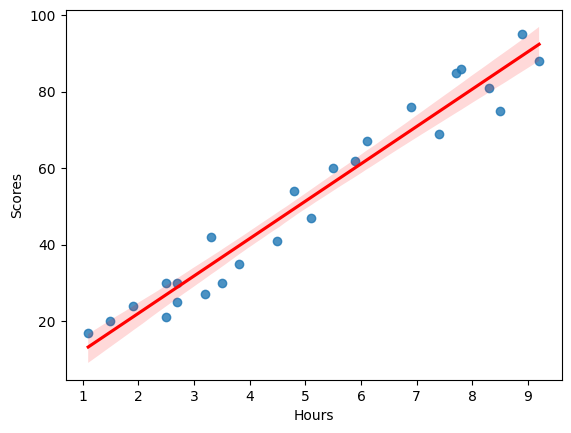

In [90]:
# Plotting the regression line
sns.regplot(data=df, x='Hours', y='Scores',line_kws=dict(color="r"))

Text(0.5, 1.0, 'Correlation Heatmap')

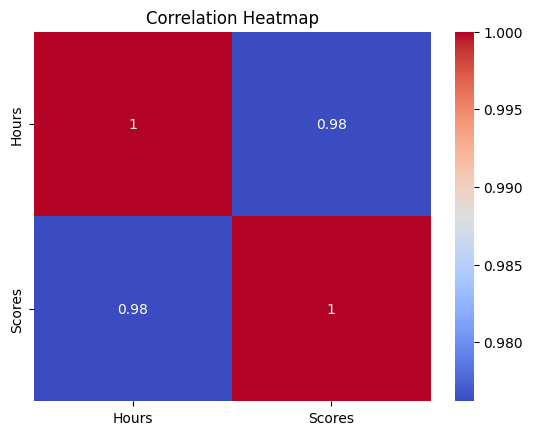

In [91]:
# Correlation heatmap plot using correlation matrix
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Modelling (Linear Regression)

In [92]:
X = df.drop("Scores", axis=1)
y=df['Scores']

In [93]:
X.dtypes

Hours    float64
dtype: object

In [94]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [95]:
y.dtypes

dtype('int64')

In [96]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Initialize and fit the model1 - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print("Training score =",model.score(X_train,y_train))
print("Test score =",model.score(X_test,y_test))

Training score = 0.9491209376364416
Test score = 0.9678055545167994


In [98]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [99]:
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [101]:
print(X_test)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9


In [102]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [109]:
# Testing with custom data
hours = np.array(9.25).reshape(-1, 1)
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours[0,0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


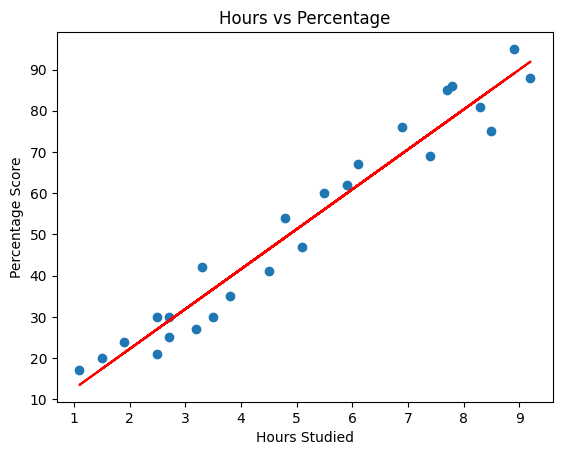

In [118]:
# Plotting the regression line
line = model.coef_*X+model.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color="r");
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [100]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error : {mae}')
print(f"R2-score : {r2}")

Mean Squared Error: 18.943211722315272
Mean Absolute Error : 3.9207511902099244
R2-score : 0.9678055545167994
